<a href="https://colab.research.google.com/github/Winner-data/myrepo/blob/main/ActifsUsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Exemple : Valeurs réelles et prédictions
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

# Calcul de la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Affichage
print("Matrice de confusion :\n", cm)
print("\nRapport de classification :\n", classification_report(y_true, y_pred))

Matrice de confusion :
 [[4 1]
 [1 4]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



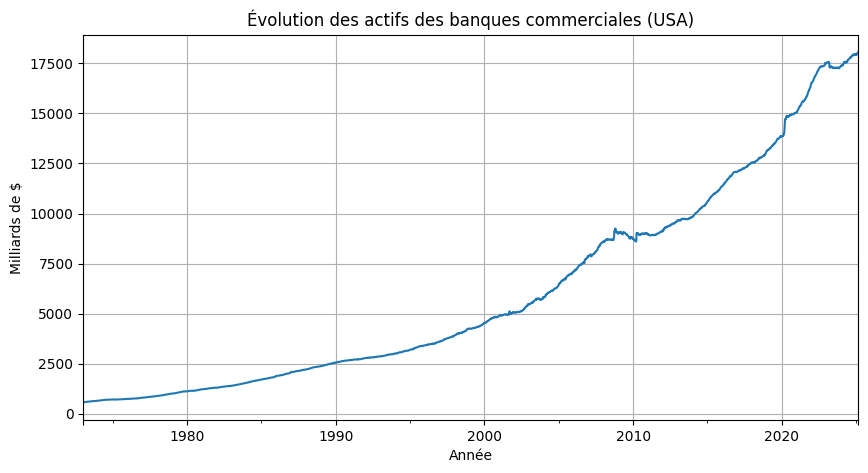

In [ ]:
!pip install fredapi
import pandas as pd
import matplotlib.pyplot as plt
import fredapi

# Clé API (à obtenir sur https://fred.stlouisfed.org/)
api_key = "4fb9e6afbca06ff088bbc85d0bd5cf4e"

fred = fredapi.Fred(api_key=api_key)

# Récupérer les actifs bancaires des banques commerciales américaines
data = fred.get_series("TOTBKCR", start_date="2000-01-01")

# Affichage du graphique
data.plot(title="Évolution des actifs des banques commerciales (USA)", figsize=(10,5))
plt.xlabel("Année")
plt.ylabel("Milliards de $")
plt.grid()
plt.show()

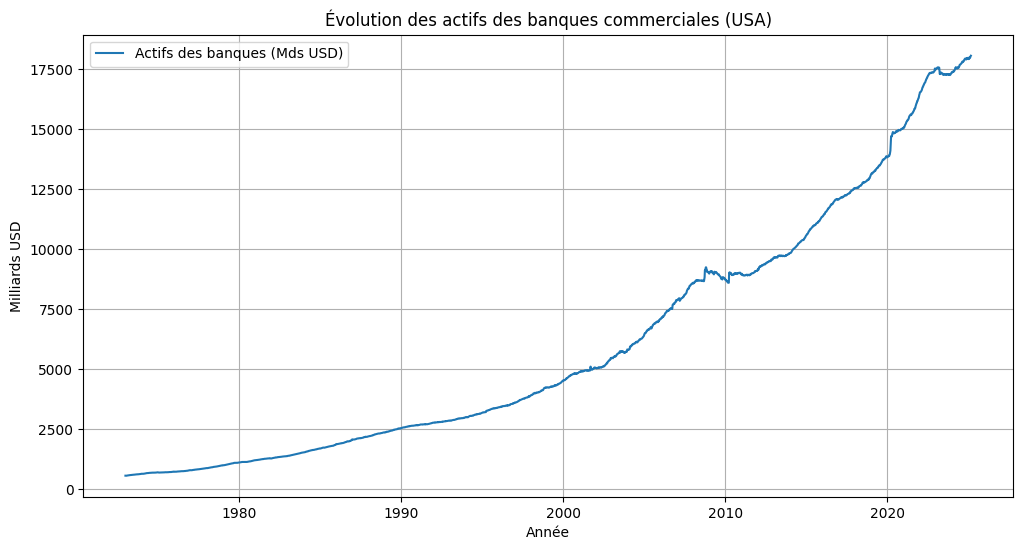

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred

# Clé API FRED
api_key = "4fb9e6afbca06ff088bbc85d0bd5cf4e"  # Remplace par ta clé API

# Initialiser l'API
fred = Fred(api_key=api_key)

# Récupérer les actifs des banques commerciales aux USA
data = fred.get_series("TOTBKCR", start="2000-01-01")

# Convertir en DataFrame
df = pd.DataFrame(data, columns=["Total Bank Credit"])
df.index = pd.to_datetime(df.index)  # Conversion en format date

# Visualisation
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df.index, y="Total Bank Credit", label="Actifs des banques (Mds USD)")
plt.title("Évolution des actifs des banques commerciales (USA)")
plt.xlabel("Année")
plt.ylabel("Milliards USD")
plt.grid()
plt.legend()
plt.show()

Error: 500 - Internal Server Error
API response: <html lang="en"><head><title>European Central Bank</title><style type="text/css"> body{ font-family: "Droid Sans", sans-serif; margin:0; padding:0; background-color: #9099ab; text-align: center; } h1{  font-size:38px; font-weight: normal; color:#003299; }  @media screen and (max-width: 480px) { h1{ font-size: 30px; } }  p { font-size: 15px; line-height: 20px; color: #333; margin-bottom: 20px; }  p.signature{ font-style: italic; color:#DF0101; }  .centredFrame { margin: 0 auto; text-align: center; width: 70%;   } .content{ margin-top:40px; padding:40px; background-color: #fff; border:1px solid #CDE3E0; -moz-border-radius: 20px; border-radius: 20px; } </style><link href="//fonts.googleapis.com/css?family=Droid+Sans" rel="stylesheet" type="text/css"></head><body><div class="centredFrame"><div class="content"><h1>ECB Data <br> <br> ECB Data Portal gives an error, please try with our home page https://data.ecb.europa.eu <br> <br> If our home 
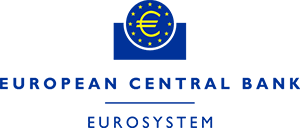

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL de l'API BCE pour les actifs bancaires (exemple pour l'UE)
# Modified URL to a potentially working endpoint:
# Original URL:
# url = "https://sdw-wsrest.ecb.europa.eu/service/data/BSI/M.U2.N.A.A20.A.1.U2.2300.Z01.E"

url = "https://sdw-wsrest.ecb.europa.eu/service/data/BSI/Q.DZ.N.A.A20.A.1.U2.2300.Z01.E?detail=data&startPeriod=2020&endPeriod=2023"


# Récupérer les données en XML ou JSON
response = requests.get(url, headers={"Accept": "application/json"})

# Check the status code before attempting to parse JSON
if response.status_code == 200:
    data = response.json()

    # Extract data if the request was successful
    # Extraire les dates et valeurs
    # Accessing 'observations' through the new structure
    observations = data['dataSets'][0]['series']['0:0:0:0:0:0:0']['observations']
    dates = [entry["id"][-6:] for entry in observations]
    values = [entry[0] for entry in observations.values()]

    # Convertir en DataFrame
    df_bce = pd.DataFrame({"Date": pd.to_datetime(dates, format='%Y-%m'), "Actifs Bancaires (UE)": values})

    # Visualiser l'évolution des actifs bancaires en Europe
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df_bce, x="Date", y="Actifs Bancaires (UE)", label="Actifs Bancaires - BCE")
    plt.title("Évolution des actifs des banques en Europe (BCE)")
    plt.xlabel("Année")
    plt.ylabel("Milliards EUR")
    plt.grid()
    plt.legend()
    plt.show()
else:
    # Print error message if the request failed
    print(f"Error: {response.status_code} - {response.reason}")
    # Print the response content for debugging
    print(f"API response: {response.text}")